In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit

# Загрузка данных
data = pd.read_csv('C:/Users/User/Downloads/students_simple.csv')

# Выбор столбцов
N = 13
col1 = data.columns[N % 5]  # 3=iq
col2 = data.columns[(N**2 % 5) + 5]  # 9=test time

x = data[col1].values
y = data[col2].values

print(x)
print(y)

[ 95 115 111  97 105  98 109 120 122  92 110 102 108 100 104 104 128 106
 105 117]
[ 8.5  6.2  6.8 12.   7.5 10.   7.2  4.2  3.5  9.5  7.8  8.   6.   4.8
  8.6 10.   4.5 12.5 10.5  6.5]


In [12]:
print("Столбец 1 (x):", col1)
print("Столбец 2 (y):", col2)
print(f"Размер выборки: n = {len(x)}")
print("\nПервые 10 значений x:", x[:10])
print("Первые 10 значений y:", y[:10])

# 1. КОРРЕЛЯЦИЯ ФЕХНЕРА
def fechner_correlation(x, y):
    if len(x) != len(y):
        raise ValueError("Массивы должны быть одинаковой длины")
    
    n = len(x)
    x_median = np.median(x)
    y_median = np.median(y)
    
    # Определяем знаки отклонений от медиан
    x_signs = np.sign(x - x_median)
    y_signs = np.sign(y - y_median)
    
    # Считаем совпадения и несовпадения знаков
    matches = np.sum(x_signs == y_signs)
    mismatches = np.sum(x_signs != y_signs)
    
    # Коэффициент Фехнера
    k_fechner = (matches - mismatches) / (matches + mismatches) #
    
    return k_fechner, matches, mismatches

# 2. КОРРЕЛЯЦИЯ ПИРСОНА С ДОВЕРИТЕЛЬНЫМ ИНТЕРВАЛОМ
def pearson_with_ci(x, y, confidence=0.95):
    r, p_value = stats.pearsonr(x, y)
    
    # Доверительный интервал для коэффициента корреляции Пирсона
    n = len(x)
    z = np.arctanh(r)  # Преобразование Фишера
    se = 1 / np.sqrt(n - 3)  # Стандартная ошибка
    
    # Z-квантиль для заданного уровня доверия
    z_critical = stats.norm.ppf((1 + confidence) / 2)
    
    # Доверительный интервал в Z-шкале
    z_lower = z - z_critical * se
    z_upper = z + z_critical * se
    
    # Обратное преобразование в шкалу корреляций
    r_lower = np.tanh(z_lower)
    r_upper = np.tanh(z_upper)
    
    return r, p_value, (r_lower, r_upper)

# Расчеты
print("=" * 60)
print("РАСЧЕТ КОРРЕЛЯЦИЙ")
print("=" * 60)

# 1. Корреляция Фехнера
k_fech, matches, mismatches = fechner_correlation(x, y)
print(f"1. КОРРЕЛЯЦИЯ ФЕХНЕРА:")
print(f"   Совпадения знаков: {matches}")
print(f"   Несовпадения знаков: {mismatches}")
print(f"   Коэффициент Фехнера: {k_fech:.4f}")

# 2. Корреляция Пирсона с доверительным интервалом
r_pearson, p_pearson, ci_pearson = pearson_with_ci(x, y)
print(f"\n2. КОРРЕЛЯЦИЯ ПИРСОНА:")
print(f"   Коэффициент Пирсона: {r_pearson:.4f}")
print(f"   p-value: {p_pearson:.6f}")
print(f"   Доверительный интервал 95%: [{ci_pearson[0]:.4f}, {ci_pearson[1]:.4f}]")

# 3. Корреляция Спирмена
r_spearman, p_spearman = stats.spearmanr(x, y)
print(f"\n3. КОРРЕЛЯЦИЯ СПИРМЕНА:")
print(f"   Коэффициент Спирмена: {r_spearman:.4f}")
print(f"   p-value: {p_spearman:.6f}")

# 4. Корреляция Кендалла
r_kendall, p_kendall = stats.kendalltau(x, y)
print(f"\n4. КОРРЕЛЯЦИЯ КЕНДАЛЛА:")
print(f"   Коэффициент Кендалла: {r_kendall:.4f}")
print(f"   p-value: {p_kendall:.6f}")

# Дополнительная информация
print("\n" + "=" * 60)
print("ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
print("=" * 60)

# Интерпретация силы корреляции
def interpret_correlation(r, method):
    abs_r = abs(r)
    if abs_r < 0.2:
        strength = "очень слабая"
    elif abs_r < 0.4:
        strength = "слабая"
    elif abs_r < 0.6:
        strength = "умеренная"
    elif abs_r < 0.8:
        strength = "сильная"
    else:
        strength = "очень сильная"
    
    direction = "положительная" if r > 0 else "отрицательная"
    return f"{method}: {direction} {strength} связь"

print(interpret_correlation(k_fech, "Фехнер"))
print(interpret_correlation(r_pearson, "Пирсон"))
print(interpret_correlation(r_spearman, "Спирмен"))
print(interpret_correlation(r_kendall, "Кендалл"))

# Проверка значимости
print(f"\nСТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ (α=0.05):")
methods = [
    ("Пирсон", p_pearson),
    ("Спирмен", p_spearman),
    ("Кендалл", p_kendall)
]

for method, p_val in methods:
    significant = "ЗНАЧИМА" if p_val < 0.05 else "НЕ ЗНАЧИМА"
    print(f"   {method}: p = {p_val:.6f} - {significant}")

Столбец 1 (x): iq
Столбец 2 (y): test_time
Размер выборки: n = 20

Первые 10 значений x: [ 95 115 111  97 105  98 109 120 122  92]
Первые 10 значений y: [ 8.5  6.2  6.8 12.   7.5 10.   7.2  4.2  3.5  9.5]
РАСЧЕТ КОРРЕЛЯЦИЙ
1. КОРРЕЛЯЦИЯ ФЕХНЕРА:
   Совпадения знаков: 4
   Несовпадения знаков: 16
   Коэффициент Фехнера: -0.6000

2. КОРРЕЛЯЦИЯ ПИРСОНА:
   Коэффициент Пирсона: -0.6818
   p-value: 0.000930
   Доверительный интервал 95%: [-0.8637, -0.3427]

3. КОРРЕЛЯЦИЯ СПИРМЕНА:
   Коэффициент Спирмена: -0.6823
   p-value: 0.000918

4. КОРРЕЛЯЦИЯ КЕНДАЛЛА:
   Коэффициент Кендалла: -0.5040
   p-value: 0.002021

ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:
Фехнер: отрицательная сильная связь
Пирсон: отрицательная сильная связь
Спирмен: отрицательная сильная связь
Кендалл: отрицательная умеренная связь

СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ (α=0.05):
   Пирсон: p = 0.000930 - ЗНАЧИМА
   Спирмен: p = 0.000918 - ЗНАЧИМА
   Кендалл: p = 0.002021 - ЗНАЧИМА


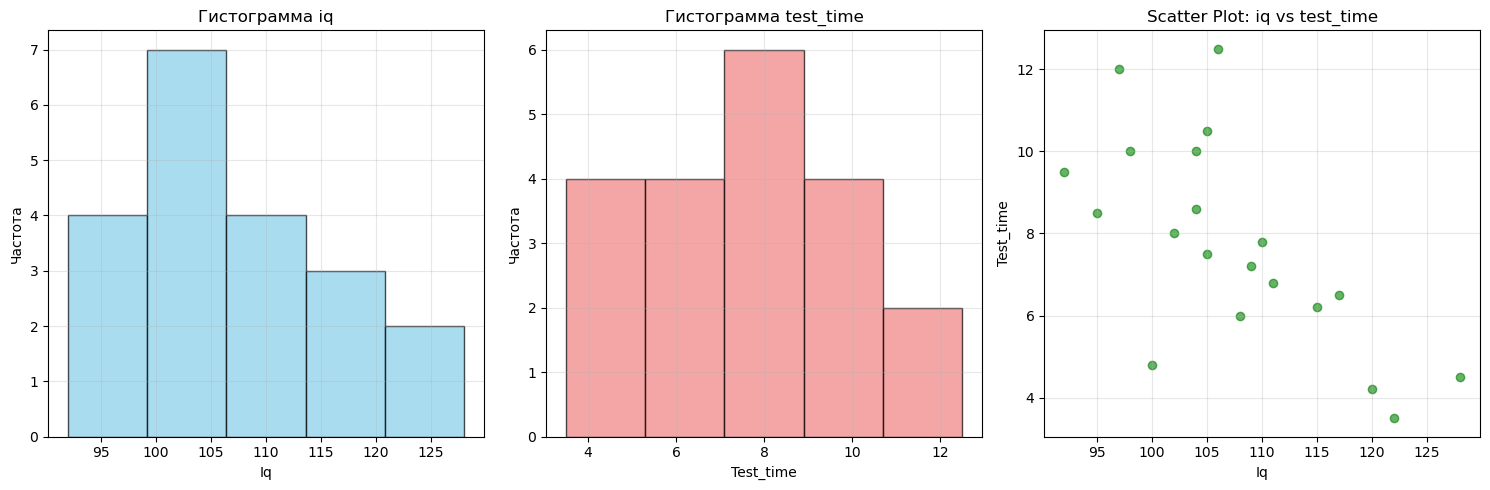

In [14]:
# Создание фигуры с тримя графиками
plt.figure(figsize=(15, 5))

x_sorted = np.sort(x)
sort_idx = np.argsort(x)

# 1. Гистограмма для X 
plt.subplot(1, 3, 1)
plt.hist(x, bins=5, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel(f'{col1.capitalize()}')
plt.ylabel('Частота')
plt.title(f'Гистограмма {col1}')
plt.grid(True, alpha=0.3)

# 2. Гистограмма для Y 
plt.subplot(1, 3, 2)
plt.hist(y, bins=5, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel(f'{col2.capitalize()}')
plt.ylabel('Частота')
plt.title(f'Гистограмма {col2}')
plt.grid(True, alpha=0.3)

# 3. Scatter plot
plt.subplot(1, 3, 3)
plt.scatter(x, y, alpha=0.6, color='green')
plt.xlabel(f'{col1.capitalize()}')
plt.ylabel(f'{col2.capitalize()}')
plt.title(f'Scatter Plot: {col1} vs {col2}')
plt.grid(True, alpha=0.3)

# Настройка layout и отображение
plt.tight_layout()
plt.show()


РАСЧЕТ КОЭФФИЦИЕНТОВ РЕГРЕССИИ
1. ЛИНЕЙНАЯ: y = -0.1831*x + 27.3961
   MSE = 3.2360
2. КВАДРАТИЧНАЯ: y = -0.003300*x² + 0.5396*x + -11.8827
   MSE = 3.1293
3. ГИПЕРБОЛИЧЕСКАЯ: y = 2091.8740/x + -11.8859
   MSE = 3.3805
4. ПОКАЗАТЕЛЬНАЯ: y = 130.8014 * 0.9735^x
   MSE = 3.5227


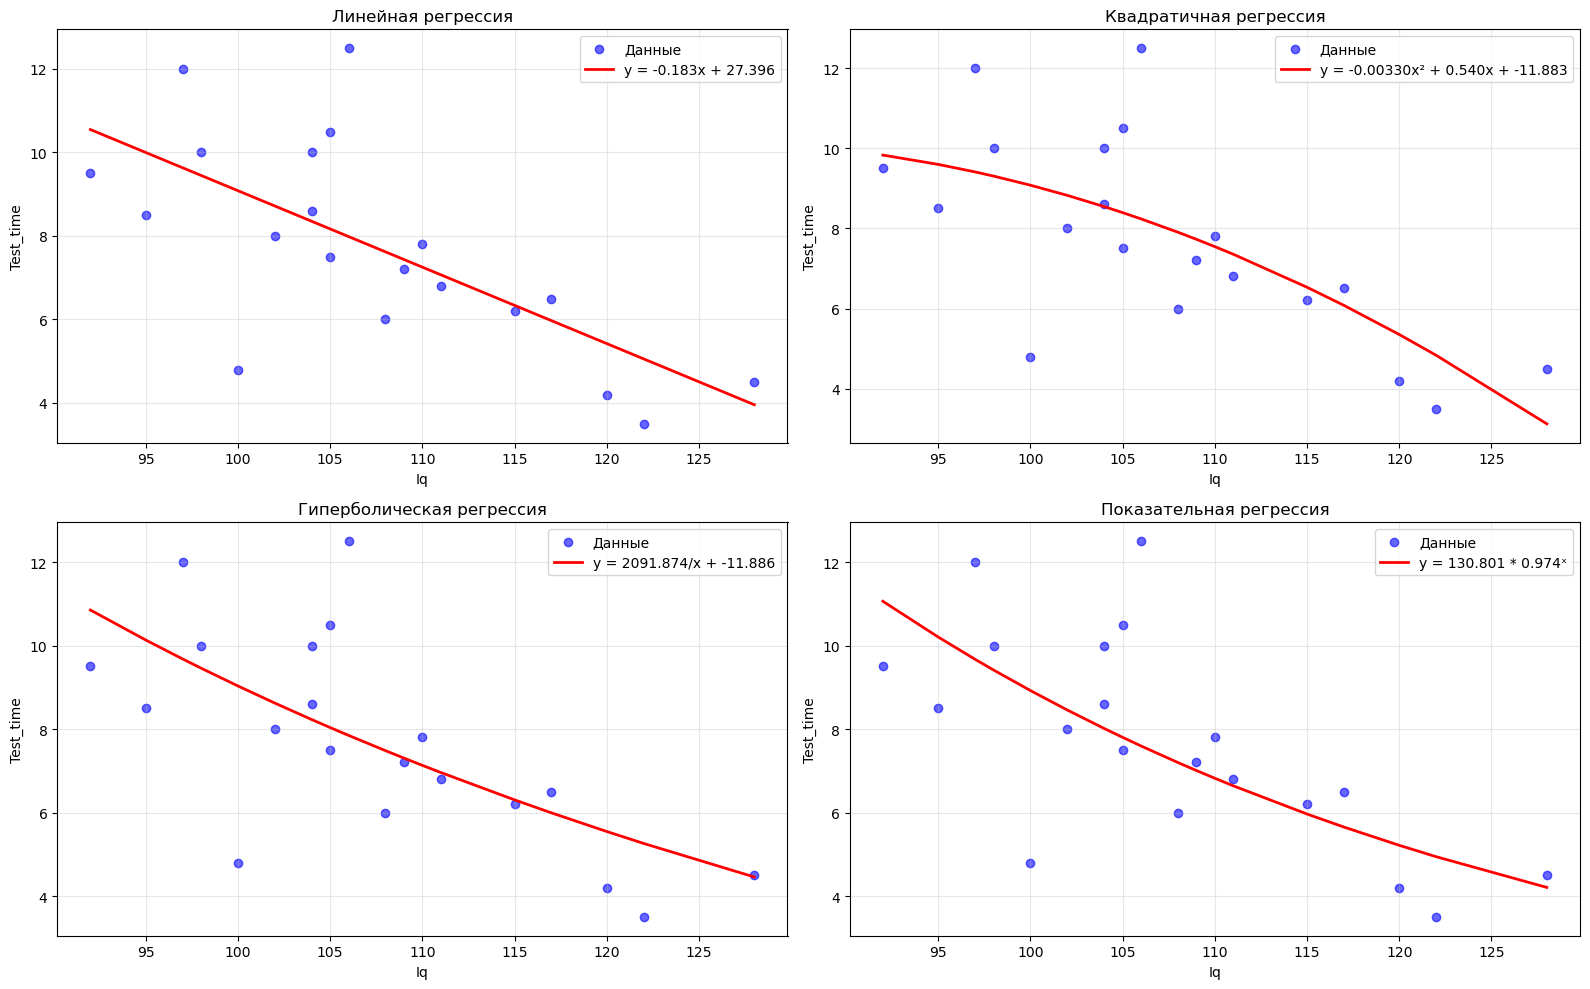


СРАВНЕНИЕ КАЧЕСТВА МОДЕЛЕЙ
Линейная        MSE = 3.2360
Квадратичная    MSE = 3.1293
Гиперболическая MSE = 3.3805
Показательная   MSE = 3.5227

Лучшая модель: Квадратичная (MSE = 3.1293)


In [3]:
# 1. ЛИНЕЙНАЯ РЕГРЕССИЯ: y = w1*x + w0
def linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Расчет коэффициентов
    w1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    w0 = y_mean - w1 * x_mean
    
    # Прогноз
    y_pred = w1 * x + w0
    mse = np.mean((y - y_pred)**2)
    
    return w0, w1, y_pred, mse

# 2. КВАДРАТИЧНАЯ РЕГРЕССИЯ: y = w2*x² + w1*x + w0
def quadratic_regression(x, y):
    n = len(x)
    
    # Матрица признаков
    X = np.column_stack([x**2, x, np.ones(n)])
    
    # Нормальное уравнение: w = (X^T * X)^(-1) * X^T * y
    XT = X.T
    w = np.linalg.inv(XT @ X) @ XT @ y
    
    w2, w1, w0 = w
    y_pred = w2 * x**2 + w1 * x + w0
    mse = np.mean((y - y_pred)**2)
    
    return w0, w1, w2, y_pred, mse

# 3. ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ: y = w1/x + w0
def hyperbolic_regression(x, y):
    n = len(x)
    
    # Преобразование: используем z = 1/x
    z = 1 / x
    
    # Линейная регрессия для z и y
    z_mean = np.mean(z)
    y_mean = np.mean(y)
    
    w1 = np.sum((z - z_mean) * (y - y_mean)) / np.sum((z - z_mean)**2)
    w0 = y_mean - w1 * z_mean
    
    y_pred = w1 / x + w0
    mse = np.mean((y - y_pred)**2)
    
    return w0, w1, y_pred, mse

# 4. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ: y = w1 * w0^x
def exponential_regression(x, y):
    # Линеаризация: ln(y) = ln(w1) + x * ln(w0)
    # y = w1 * w0^x => ln(y) = ln(w1) + x * ln(w0)
    
    # Проверка на положительные значения y
    if np.any(y <= 0):
        print("Предупреждение: для показательной регрессии y должен быть > 0")
        # Добавляем константу чтобы избежать отрицательных значений
        y_adj = y - np.min(y) + 0.1
    else:
        y_adj = y
    
    ln_y = np.log(y_adj)
    
    # Линейная регрессия для x и ln(y)
    x_mean = np.mean(x)
    ln_y_mean = np.mean(ln_y)
    
    b = np.sum((x - x_mean) * (ln_y - ln_y_mean)) / np.sum((x - x_mean)**2)
    a = ln_y_mean - b * x_mean
    
    # Преобразование обратно
    w0 = np.exp(b)  # w0 в исходном уравнении
    w1 = np.exp(a)  # w1 в исходном уравнении
    
    y_pred = w1 * (w0 ** x)
    mse = np.mean((y - y_pred)**2)
    
    return w0, w1, y_pred, mse

# Расчет всех моделей
print("\n" + "="*50)
print("РАСЧЕТ КОЭФФИЦИЕНТОВ РЕГРЕССИИ")
print("="*50)

# 1. Линейная
w0_lin, w1_lin, y_pred_lin, mse_lin = linear_regression(x, y)
print(f"1. ЛИНЕЙНАЯ: y = {w1_lin:.4f}*x + {w0_lin:.4f}")
print(f"   MSE = {mse_lin:.4f}")

# 2. Квадратичная
w0_quad, w1_quad, w2_quad, y_pred_quad, mse_quad = quadratic_regression(x, y)
print(f"2. КВАДРАТИЧНАЯ: y = {w2_quad:.6f}*x² + {w1_quad:.4f}*x + {w0_quad:.4f}")
print(f"   MSE = {mse_quad:.4f}")

# 3. Гиперболическая
w0_hyp, w1_hyp, y_pred_hyp, mse_hyp = hyperbolic_regression(x, y)
print(f"3. ГИПЕРБОЛИЧЕСКАЯ: y = {w1_hyp:.4f}/x + {w0_hyp:.4f}")
print(f"   MSE = {mse_hyp:.4f}")

# 4. Показательная
w0_exp, w1_exp, y_pred_exp, mse_exp = exponential_regression(x, y)
print(f"4. ПОКАЗАТЕЛЬНАЯ: y = {w1_exp:.4f} * {w0_exp:.4f}^x")
print(f"   MSE = {mse_exp:.4f}")

# ВИЗУАЛИЗАЦИЯ
plt.figure(figsize=(16, 10))

# Сортируем данные для гладких графиков
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]

# 1. Линейная регрессия
plt.subplot(2, 2, 1)
plt.scatter(x, y, alpha=0.6, color='blue', label='Данные')
plt.plot(x_sorted, w1_lin * x_sorted + w0_lin, 'r-', linewidth=2, 
         label=f'y = {w1_lin:.3f}x + {w0_lin:.3f}')
plt.xlabel(f'{col1.capitalize()}')
plt.ylabel(f'{col2.capitalize()}')
plt.title('Линейная регрессия')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Квадратичная регрессия
plt.subplot(2, 2, 2)
plt.scatter(x, y, alpha=0.6, color='blue', label='Данные')
plt.plot(x_sorted, w2_quad * x_sorted**2 + w1_quad * x_sorted + w0_quad, 'r-', linewidth=2,
         label=f'y = {w2_quad:.5f}x² + {w1_quad:.3f}x + {w0_quad:.3f}')
plt.xlabel(f'{col1.capitalize()}')
plt.ylabel(f'{col2.capitalize()}')
plt.title('Квадратичная регрессия')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Гиперболическая регрессия
plt.subplot(2, 2, 3)
plt.scatter(x, y, alpha=0.6, color='blue', label='Данные')
plt.plot(x_sorted, w1_hyp / x_sorted + w0_hyp, 'r-', linewidth=2,
         label=f'y = {w1_hyp:.3f}/x + {w0_hyp:.3f}')
plt.xlabel(f'{col1.capitalize()}')
plt.ylabel(f'{col2.capitalize()}')
plt.title('Гиперболическая регрессия')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Показательная регрессия
plt.subplot(2, 2, 4)
plt.scatter(x, y, alpha=0.6, color='blue', label='Данные')
plt.plot(x_sorted, w1_exp * (w0_exp ** x_sorted), 'r-', linewidth=2,
         label=f'y = {w1_exp:.3f} * {w0_exp:.3f}ˣ')
plt.xlabel(f'{col1.capitalize()}')
plt.ylabel(f'{col2.capitalize()}')
plt.title('Показательная регрессия')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# СРАВНЕНИЕ МОДЕЛЕЙ
print("\n" + "="*50)
print("СРАВНЕНИЕ КАЧЕСТВА МОДЕЛЕЙ")
print("="*50)

models = [
    ("Линейная", mse_lin),
    ("Квадратичная", mse_quad), 
    ("Гиперболическая", mse_hyp),
    ("Показательная", mse_exp)
]

# Находим лучшую модель
best_model = min(models, key=lambda x: x[1])

for name, mse in models:
    print(f"{name:15} MSE = {mse:.4f}")

print(f"\nЛучшая модель: {best_model[0]} (MSE = {best_model[1]:.4f})")


In [5]:
import numpy as np
from scipy import stats

# 5. ПРОВЕРКА КВАДРАТИЧНОЙ И ПОКАЗАТЕЛЬНОЙ МОДЕЛЕЙ ПО КРИТЕРИЮ ФИШЕРА
print("\n" + "="*60)
print("ПРОВЕРКА МОДЕЛЕЙ ПО КРИТЕРИЮ ФИШЕРА")
print("="*60)

def f_test(y_true, y_pred, k, n):
    """
    Проверка адекватности модели по критерию Фишера
    
    Parameters:
    y_true - фактические значения
    y_pred - предсказанные значения  
    k - количество параметров модели
    n - объем выборки
    """
    # Сумма квадратов остатков
    ss_res = np.sum((y_true - y_pred) ** 2)
    
    # Сумма квадратов регрессии
    ss_reg = np.sum((y_pred - np.mean(y_true)) ** 2)
    
    # Средние квадраты
    ms_reg = ss_reg / (k - 1)  # для модели
    ms_res = ss_res / (n - k)  # для остатков
    
    # F-статистика
    f_statistic = ms_reg / ms_res if ms_res != 0 else np.inf
    
    return f_statistic, ss_reg, ss_res, ms_reg, ms_res

# Параметры для критерия Фишера
n = len(y)
alpha = 0.05  # уровень значимости

print("ПАРАМЕТРЫ ТЕСТА:")
print(f"Объем выборки: n = {n}")
print(f"Уровень значимости: α = {alpha}")

# Проверка КВАДРАТИЧНОЙ модели
print("\n" + "-"*50)
print("КВАДРАТИЧНАЯ МОДЕЛЬ")
print("-"*50)
print(f"Уравнение: y = {w2_quad:.6f}*x² + {w1_quad:.4f}*x + {w0_quad:.4f}")
print(f"MSE = {mse_quad:.4f}")

# Для квадратичной модели: 3 параметра (w0, w1, w2)
k_quad = 3
f_stat_quad, ss_reg_quad, ss_res_quad, ms_reg_quad, ms_res_quad = f_test(y, y_pred_quad, k_quad, n)

# Критическое значение F-распределения
f_crit_quad = stats.f.ppf(1 - alpha, k_quad - 1, n - k_quad)
p_value_quad = 1 - stats.f.cdf(f_stat_quad, k_quad - 1, n - k_quad)

print(f"F-статистика: {f_stat_quad:.4f}")
print(f"F-критическое (α={alpha}): {f_crit_quad:.4f}")
print(f"p-value: {p_value_quad:.6f}")
print(f"Степени свободы: ({k_quad - 1}, {n - k_quad})")

# Проверка гипотезы для квадратичной модели
if f_stat_quad > f_crit_quad:
    print("✓ Квадратичная модель АДЕКВАТНА (Fрасч > Fкрит)")
    print("  Отвергаем H₀: модель статистически значима")
else:
    print("✗ Квадратичная модель НЕАДЕКВАТНА (Fрасч ≤ Fкрит)")
    print("  Нет оснований отвергать H₀: модель незначима")

# Проверка ПОКАЗАТЕЛЬНОЙ модели
print("\n" + "-"*50)
print("ПОКАЗАТЕЛЬНАЯ МОДЕЛЬ")
print("-"*50)
print(f"Уравнение: y = {w1_exp:.4f} * {w0_exp:.4f}^x")
print(f"MSE = {mse_exp:.4f}")

# Для показательной модели: 2 параметра (w0, w1)
k_exp = 2
f_stat_exp, ss_reg_exp, ss_res_exp, ms_reg_exp, ms_res_exp = f_test(y, y_pred_exp, k_exp, n)

# Критическое значение F-распределения
f_crit_exp = stats.f.ppf(1 - alpha, k_exp - 1, n - k_exp)
p_value_exp = 1 - stats.f.cdf(f_stat_exp, k_exp - 1, n - k_exp)

print(f"F-статистика: {f_stat_exp:.4f}")
print(f"F-критическое (α={alpha}): {f_crit_exp:.4f}")
print(f"p-value: {p_value_exp:.6f}")
print(f"Степени свободы: ({k_exp - 1}, {n - k_exp})")

# Проверка гипотезы для показательной модели
if f_stat_exp > f_crit_exp:
    print("✓ Показательная модель АДЕКВАТНА (Fрасч > Fкрит)")
    print("  Отвергаем H₀: модель статистически значима")
else:
    print("✗ Показательная модель НЕАДЕКВАТНА (Fрасч ≤ Fкрит)")
    print("  Нет оснований отвергать H₀: модель незначима")




ПРОВЕРКА МОДЕЛЕЙ ПО КРИТЕРИЮ ФИШЕРА
ПАРАМЕТРЫ ТЕСТА:
Объем выборки: n = 20
Уровень значимости: α = 0.05

--------------------------------------------------
КВАДРАТИЧНАЯ МОДЕЛЬ
--------------------------------------------------
Уравнение: y = -0.003300*x² + 0.5396*x + -11.8827
MSE = 3.1293
F-статистика: 7.9258
F-критическое (α=0.05): 3.5915
p-value: 0.003699
Степени свободы: (2, 17)
✓ Квадратичная модель АДЕКВАТНА (Fрасч > Fкрит)
  Отвергаем H₀: модель статистически значима

--------------------------------------------------
ПОКАЗАТЕЛЬНАЯ МОДЕЛЬ
--------------------------------------------------
Уравнение: y = 130.8014 * 0.9735^x
MSE = 3.5227
F-статистика: 16.0237
F-критическое (α=0.05): 4.4139
p-value: 0.000834
Степени свободы: (1, 18)
✓ Показательная модель АДЕКВАТНА (Fрасч > Fкрит)
  Отвергаем H₀: модель статистически значима
